In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=50, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-4cd1a040-9dde-42ff-87d6-bb9e3747a754.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.83529998]),
                           Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
                           Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
                           Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
                           Object(name=cereal0, pos=[0.4

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [3]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 1 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(9) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(9) -> A(13) -> S'(16) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(16) -> A(19) -> S'(23) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(23) -> A(24) -> S'(31) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(31) -> A(39) -> S'(40) Reward : 1.667
[Action] Rearr can0
Good Action
[Reward] S(40) -> A(44) -> S'(48) Reward : 1.429
[Action] Rearr ben_cube0
Good Action
[Reward] S(48) -> A(50) -> S'(56) Reward : 1.25
[Action] Rearr milk0
Good Action
[Reward] S(56) -> A(61) -> S'(62) Reward : 1.111
[Action] Rearr can1
Good Action
[Reward] S(62) -> A(66) -> S'(67) Reward : 1.0
##########['cereal0', 'can0', 'ben_cube0', 'milk0', 'can1']#############
Success!!!!!
Terminal Stat

Good Action
[Reward] S(352) -> A(354) -> S'(359) Reward : 2.0
[Action] Rearr can1
placed another place not goal
[Reward] S(359) -> A(362) -> S'(367) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(367) -> A(371) -> S'(374) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(374) -> A(375) -> S'(381) Reward : -2.857
[Action] Rearr can1
placed another place not goal
[Reward] S(381) -> A(384) -> S'(389) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(389) -> A(391) -> S'(397) Reward : 1.0
[Action] Rearr can0
placed another place not goal
[Reward] S(397) -> A(398) -> S'(405) Reward : -1
Exceeded the maximum depth!!
########### Running time :  5.527094125747681 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 7 ===========
[Action] Rearr milk0
Good Action
[Reward] S(0) -> A(7) -> S'(406) Reward : 5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(406) -> A(408) -> S'(414) Reward : 3.333
[Ac

placed another place not goal
[Reward] S(684) -> A(685) -> S'(691) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(691) -> A(694) -> S'(698) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(698) -> A(701) -> S'(704) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(704) -> A(710) -> S'(711) Reward : -2.222
[Action] Rearr can0
Good Action
[Reward] S(711) -> A(715) -> S'(719) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  9.885589122772217 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 12 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(9) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(9) -> A(11) -> S'(720) Reward : 3.333
[Action] Rearr milk0
placed another place not goal
[Reward] S(720) -> A(725) -> S'(728) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(728) -> A(731) -> S'(735) Reward : 

placed another place not goal
[Reward] S(993) -> A(994) -> S'(1000) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1000) -> A(1005) -> S'(1006) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  14.025606870651245 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 17 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(9) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(9) -> A(14) -> S'(1007) Reward : 3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(1007) -> A(1009) -> S'(1015) Reward : 2.5
[Action] Rearr milk0
Bad Action
[Reward] S(1015) -> A(1020) -> S'(1023) Reward : -5.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1023) -> A(1027) -> S'(1031) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1031) -> A(1032) -> S'(1038) Reward : -3.333
[Action] Rearr can0
placed another place not goal
[Reward] S(1038) -> A(1039) -> S'(1047

[Action] Rearr milk0
placed another place not goal
[Reward] S(1295) -> A(1300) -> S'(1303) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(1303) -> A(1309) -> S'(1312) Reward : 1.667
[Action] Rearr can0
Good Action
[Reward] S(1312) -> A(1316) -> S'(1321) Reward : 1.429
[Action] Rearr can1
Bad Action
[Reward] S(1321) -> A(1324) -> S'(1329) Reward : -2.857
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1329) -> A(1330) -> S'(1336) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1336) -> A(1343) -> S'(1344) Reward : 1.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1344) -> A(1348) -> S'(1352) Reward : -1
Exceeded the maximum depth!!
########### Running time :  19.029199361801147 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 23 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(9) Reward : -1
[Action] Rearr cereal0
placed another place not go

[Action] Rearr can1
Good Action
[Reward] S(1585) -> A(1587) -> S'(1591) Reward : 1.667
[Action] Rearr milk0
Good Action
[Reward] S(1591) -> A(1595) -> S'(1597) Reward : 1.429
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1597) -> A(1598) -> S'(1603) Reward : -2.857
[Action] Rearr cereal0
Good Action
[Reward] S(1603) -> A(1608) -> S'(1609) Reward : 1.111
[Action] Rearr can0
Bad Action
[Reward] S(1609) -> A(1612) -> S'(1615) Reward : -2.222
[Action] Rearr can1
Bad Action
[Reward] S(1615) -> A(1617) -> S'(1620) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  22.938549518585205 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 28 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(68) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(68) -> A(73) -> S'(894) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(894) -> A(896) -> S'(1621) Rew

Bad Action
[Reward] S(1865) -> A(1870) -> S'(1873) Reward : -2.857
[Action] Rearr ben_cube0
Good Action
[Reward] S(1873) -> A(1875) -> S'(1882) Reward : 1.111
[Action] Rearr can1
Good Action
[Reward] S(1882) -> A(1886) -> S'(1891) Reward : 1.0
[Action] Rearr can0
Good Action
[Reward] S(1891) -> A(1894) -> S'(1899) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  26.9106502532959 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 33 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(336) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(336) -> A(339) -> S'(1900) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(1900) -> A(1905) -> S'(1909) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1909) -> A(1915) -> S'(1916) Reward : 2.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(1916) -> A(1921) -> S'(192

placed another place not goal
[Reward] S(2165) -> A(2167) -> S'(2170) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(2170) -> A(2175) -> S'(2176) Reward : 1.0
[Action] Rearr can1
placed another place not goal
[Reward] S(2176) -> A(2179) -> S'(2183) Reward : -1
Exceeded the maximum depth!!
########### Running time :  30.89863133430481 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 38 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(9) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(9) -> A(13) -> S'(16) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(16) -> A(19) -> S'(23) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(23) -> A(25) -> S'(2184) Reward : 2.0
[Action] Rearr can0
Good Action
[Reward] S(2184) -> A(2186) -> S'(2193) Reward : 1.667
[Action] Rearr cereal0
Good Action
[Reward] S(2193) -> A(2200) -> S'(2201) 

Good Action
[Reward] S(894) -> A(898) -> S'(2447) Reward : 2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2447) -> A(2454) -> S'(2456) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2456) -> A(2457) -> S'(2463) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(2463) -> A(2468) -> S'(2471) Reward : 1.429
[Action] Rearr can1
placed another place not goal
[Reward] S(2471) -> A(2474) -> S'(2478) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2478) -> A(2483) -> S'(2485) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(2485) -> A(2489) -> S'(2491) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2491) -> A(2492) -> S'(2498) Reward : -1
Exceeded the maximum depth!!
########### Running time :  35.53797483444214 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 44 ===========
[Action] Rearr milk0
place

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2739) -> A(2740) -> S'(2746) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(2746) -> A(2751) -> S'(2753) Reward : -4.0
[Action] Rearr can0
Good Action
[Reward] S(2753) -> A(2757) -> S'(2761) Reward : 1.429
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2761) -> A(2762) -> S'(2769) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(2769) -> A(2770) -> S'(2775) Reward : -2.5
[Action] Rearr can1
placed another place not goal
[Reward] S(2775) -> A(2778) -> S'(2783) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2783) -> A(2784) -> S'(2791) Reward : -1
Exceeded the maximum depth!!
########### Running time :  39.69650435447693 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 49 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(336) Reward : -1
[Action] Rearr ben_cube0
pla

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

8.656349206349208 {0: {'nodes': [0, 4, 9, 13, 16, 19, 23, 24, 31, 39, 40, 44, 48, 50, 56, 61, 62, 66, 67], 'value': 6.556349206349207}, 1: {'nodes': [0, 1, 68, 71, 76, 83, 84, 92, 93, 97, 102, 105, 109, 111, 116, 121, 122], 'value': 8.656349206349208}, 2: {'nodes': [0, 1, 68, 73, 894, 900, 903, 907, 912, 913, 920, 923, 926, 927, 933, 938, 939, 941, 945], 'value': 8.139682539682541}, 3: {'nodes': [0, 4, 9, 13, 16, 17, 1244, 1246, 1253, 1256, 1262, 1268, 1269, 1270, 1276, 1281, 1282, 1284, 1288, 1291, 1294], 'value': 5.44877344877345}}
Result 1 :  [0, 1, 68, 71, 76, 83, 84, 92, 93, 97, 102, 105, 109, 111, 116, 121, 122]
state num : 17


# Make Contact_graspNet's GraspEstimator

In [5]:
import os
import sys
import argparse
import numpy as np
import time
import glob
import cv2

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.config.experimental.set_virtual_device_configuration(
            physical_devices[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)])  # 4GB 제한

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('/home/juju/contact_graspnet/contact_graspnet/inference.py')))
sys.path.append(os.path.join(BASE_DIR))
sys.path.append(os.path.join('/home/juju/contact_graspnet/contact_graspnet'))

import config_utils
from data import regularize_pc_point_count, depth2pc, load_available_input_data

from contact_graspnet import contact_graspnet

from contact_grasp_estimator import GraspEstimator
from visualization_utils import visualize_grasps, show_image

parser = argparse.ArgumentParser()
parser.add_argument('--ckpt_dir', default='checkpoints/scene_test_2048_bs3_hor_sigma_001', help='Log dir [default: checkpoints/scene_test_2048_bs3_hor_sigma_001]')
parser.add_argument('--np_path', default='test_data/7.npy', help='Input data: npz/npy file with keys either "depth" & camera matrix "K" or just point cloud "pc" in meters. Optionally, a 2D "segmap"')
parser.add_argument('--png_path', default='', help='Input data: depth map png in meters')
parser.add_argument('--K', default=None, help='Flat Camera Matrix, pass as "[fx, 0, cx, 0, fy, cy, 0, 0 ,1]"')
parser.add_argument('--z_range', default=[0.2,1.8], help='Z value threshold to crop the input point cloud')
parser.add_argument('--local_regions', action='store_true', default=False, help='Crop 3D local regions around given segments.')
parser.add_argument('--filter_grasps', action='store_true', default=False,  help='Filter grasp contacts according to segmap.')
parser.add_argument('--skip_border_objects', action='store_true', default=False,  help='When extracting local_regions, ignore segments at depth map boundary.')
parser.add_argument('--forward_passes', type=int, default=1,  help='Run multiple parallel forward passes to mesh_utils more potential contact points.')
parser.add_argument('--segmap_id', type=int, default=0,  help='Only return grasps of the given object id')
parser.add_argument('--arg_configs', nargs="*", type=str, default=[], help='overwrite config parameters')

FLAGS = parser.parse_args(args=[])

global_config = config_utils.load_config(FLAGS.ckpt_dir, batch_size=FLAGS.forward_passes, arg_configs=FLAGS.arg_configs)

## Config를 받아서 GraspEstimatorr Class를 받아옴. 
grasp_estimator = GraspEstimator(global_config)


2023-07-08 19:54:55.582964: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-08 19:54:56.233038: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-08 19:54:56.281056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-08 19:54:56.281333: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-07-08 19:54:56.281389: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-08 19:54:56.287243: I tensorflow/stream_executor/pl

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)


In [6]:
global_config

{'DATA': {'scene_contacts_path': 'acronym/scene_contacts',
  'gripper_width': 0.08,
  'input_normals': False,
  'use_uniform_quaternions': False,
  'view_sphere': {'elevation': [30, 150], 'distance_range': [0.9, 1.3]},
  'train_on_scenes': True,
  'labels': {'to_gpu': False,
   'bin_weights': [0.16652107,
    0.21488856,
    0.37031708,
    0.55618503,
    0.75124664,
    0.93943357,
    1.07824539,
    1.19423112,
    1.55731375,
    3.17161779],
   'filter_z': True,
   'k': 1,
   'max_radius': 0.005,
   'num_neg_contacts': 0,
   'num_pos_contacts': 8000,
   'offset_bins': [0,
    0.00794435329,
    0.0158887021,
    0.0238330509,
    0.0317773996,
    0.0397217484,
    0.0476660972,
    0.055610446,
    0.0635547948,
    0.0714991435,
    0.08],
   'z_val': -0.1},
  'pc_augm': {'occlusion_nclusters': 0,
   'occlusion_dropout_rate': 0.0,
   'sigma': 0.0,
   'clip': 0.005},
  'depth_augm': {'sigma': 0.001, 'clip': 0.005, 'gaussian_kernel': 0},
  'raw_num_points': 20000,
  'ndataset_poi

# Make Network 

In [7]:
grasp_estimator.build_network()


# Add ops to save and restore all the variables.
saver = tf.train.Saver(save_relative_paths=True)

# Create a session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
sess = tf.Session(config=config)


--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-07-08 19:54:58.804086: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 19:54:58.804943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-08 19:54:58.805018: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-07-08 19:54:58.805066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

In [8]:
checkpoint_dir = '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/'

# Load weights
# grasp_estimator.load_weights(sess, saver, checkpoint_dir, mode='test')
saver.restore(sess, '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144')

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-07-08 19:54:59.126618: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3609600000 Hz


# Get point cloud 

old한 방법임. 아래 synthetic scene에서 더 간단하게 get함. 

In [9]:
# # max_value_nodes = mcts.history_level_1_optimal_nodes[1]
# state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
# action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

# for i in range(len(max_value_nodes)//2):
# #     print("current state : ", max_value_nodes[2*i])
# #     print("action : ", max_value_nodes[2*i + 1])
# #     print("next state : ", max_value_nodes[2*(i+1)])
    
#     print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
#     current_state_pc, current_pc_segments, current_pc_color, current_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
#     next_state_pc, next_pc_segments, next_pc_color,  next_count = pc_utils.get_obj_point_clouds(
#                                 rearrangement1.init_scene,
#                                 mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                 mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
#                                 )
    
#     print()
    
#     if i==3:
#         break

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# obj_to_manipulate

In [10]:
# table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# all_color = np.vstack([current_pc_color, next_pc_color])
# all_color = np.vstack([all_color, table_color])
# all_color = np.vstack([all_color, table_color])


# current_state_pc = np.vstack([current_state_pc, table_point_cloud])
# next_state_pc = np.vstack([next_state_pc, table_point_cloud])

# obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
# combined_pc = pc_utils.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
#                                         mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
#                                         obj_to_manipulate,
#                                         current_state_pc,
#                                         next_state_pc,
#                                         next_count
#                                        )


# mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

In [11]:
# ##### %matplotlib inline
# import trimesh
# from trimesh.util import concatenate

# # table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# # all_pc = np.vstack([combined_pc, table_point_cloud])


# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# print(len(next_state_pc))
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

# #################### 
# # 포인트 클라우드를 렌더링
# colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# all_pc, shift_xy, cTn = combined_pc

# pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
# scene = trimesh.Scene(pc_full)
# # Set the camera viewpoint

# # Set point size and color
# scene.point_size = 5.0  # Increase point size to make them more visible

# # Show the scene
# scene.show()

# Synthetic scene making and get point cloud 

In [60]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 0

obj_to_manipulate = mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
print(obj_to_manipulate)

mixed_rearr_action = mcts.rearr_action.get_combined_pc_from_mixed_scene(
                                                     next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
                                                     current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
                                                     obj_to_manipulate=obj_to_manipulate
                                                     )


ben_cube0


In [61]:
pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
                            rearrangement1.init_scene,
                            mcts.rearr_action.scene_mngr.scene,
                            mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                            )

table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

all_pc = np.vstack([pc, table_point_cloud])
all_color = np.vstack([pc_color, table_color])


# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

mcts.rearr_action.scene_mngr.scene.objs


sup_obj : ['table', 'table']


{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.37981909 0.33386571 0.83529998]),
 'can0': Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
 'can1': Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
 'milk0': Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
 'cereal0': Object(name=cereal0, pos=[0.43695543 0.12948806 0.88526188]),
 'table_current': Object(name=table_current, pos=[-0.700747    0.65239532  1.1263411 ]),
 'ben_cube0_current': Object(name=ben_cube0_current, pos=[0.37981909 0.33386571 0.83529998]),
 'can0_current': Object(name=can0_current, pos=[0.30359643 0.29319808 0.79939587]),
 'can1_current': Object(name=can1_current, pos=[0.02087744 0.14104537 0.60672921]),
 'milk0_current': Object(name=milk0_current, pos=[0.09933534 0.18637059 1.07603904]),
 'cereal0_current': Object(name=cereal0_current, pos=[0.34356482 0.25764333 0.66857275])}

In [62]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# all_pc = np.vstack([combined_pc, table_point_cloud])


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(obj_to_manipulate)
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)

# Set point size and color
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

ben_cube0


# Change Point clouds from world coord to camera coord

In [63]:
from pykin.utils.transform_utils import get_inverse_homogeneous

T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
         1.60000008e-01],
       [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
         6.34369494e-01],
       [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.63132538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
w_T_cam = w_T_cam.dot(
            trimesh.transformations.euler_matrix(np.pi, 0, 0)
        )

cam_T_w = get_inverse_homogeneous(w_T_cam)
ones_arr = np.full((len(all_pc), 1), 1)
w_pc = np.hstack((all_pc, ones_arr))

cam_pc =  np.dot(cam_T_w, w_pc.T).T

# next_pc_segment도 변경해줘 
ones_arr = np.full((len(pc_segments[obj_to_manipulate]), 1), 1)
w_pc = np.hstack((pc_segments[obj_to_manipulate], ones_arr))

pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T


## Manipulation 하고싶은 object에 대해서만 Cube 생성함. 

In [64]:
pc_segments

{'ben_cube0': array([[ 0.33203286, -0.16504183,  1.05906065,  1.        ],
        [ 0.30956778, -0.20593093,  1.07128115,  1.        ],
        [ 0.29659   , -0.17579744,  1.04145224,  1.        ],
        ...,
        [ 0.28285027, -0.18667142,  1.04773033,  1.        ],
        [ 0.32663203, -0.18268222,  1.04542717,  1.        ],
        [ 0.29958126, -0.14395648,  1.05434282,  1.        ]])}

In [65]:
import numpy as np
import trimesh

pc_regions, _ = grasp_estimator.extract_3d_cam_boxes(cam_pc[:,:3], pc_segments, min_size=0.4)

colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)
pc_region_1 = pc_regions[obj_to_manipulate]

# Home
rand_xy = np.random.random((100,3))/100
# z = np.ones((10,1))*0.8
# rand_xy = np.hstack([rand_xy,z])
pc_region_test = trimesh.points.PointCloud(np.vstack([pc_region_1, rand_xy]),  colors=colors)



scene = trimesh.Scene(pc_region_test)

print(pc_regions[obj_to_manipulate].shape, obj_to_manipulate)
scene.point_size=2.0
scene.show()


Extracted Region Cube Size:  0.4
(20000, 3) ben_cube0


In [66]:
all_pc = cam_pc[:,:3]
print(all_pc.shape, pc_regions[obj_to_manipulate].shape, obj_to_manipulate)

pred_grasps_cam, scores, contact_pts, gripper_openings = {}, {}, {}, {}

(33000, 3) (20000, 3) ben_cube0


# generate grasp on obj_to_manipulation

In [67]:
forward_passes = 1
filter_grasps = True 
local_regions = True 
for name_ in pc_segments.keys():
    pred_grasps_cam[name_], scores[name_], contact_pts[name_], gripper_openings[name_] = grasp_estimator.predict_grasps(sess, pc_regions[obj_to_manipulate], convert_cam_coords=True, forward_passes=forward_passes)

# filter grasps

In [68]:
segment_keys = contact_pts.keys()
print(contact_pts[obj_to_manipulate].shape)
for k in segment_keys:
    if np.any(pc_regions[k]) and np.any(contact_pts[k]):
        segment_idcs = grasp_estimator.filter_segment(contact_pts[k], pc_segments[k], thres=0.005)
        
        pred_grasps_cam[k] = pred_grasps_cam[k][segment_idcs]
        scores[k] = scores[k][segment_idcs]
        contact_pts[k] = contact_pts[k][segment_idcs]        
        try:
            gripper_openings[k] = gripper_openings[k][segment_idcs]
        except:
            print('skipped gripper openings {}'.format(gripper_openings[k]))
        if local_regions and np.any(pred_grasps_cam[k]):
            print('Generated {} grasps for object {}'.format(len(pred_grasps_cam[k]), k))            
    else:
        print('skipping obj {} since  np.any(pc_segments[k]) {} and np.any(contact_pts[j]) is {}'.format(k, np.any(pc_regions[k]), np.any(contact_pts[j])))
        
        


(200, 3)
Generated 17 grasps for object ben_cube0


In [69]:
visualize_grasps(
            all_pc, pred_grasps_cam, scores, plot_opencv_cam=True, pc_colors=all_color
        )

Visualizing...takes time


# Change camera coord to world coord 

생성된 grasp은 camera coord 기준으로 생성되어 있음. 즉, cam_T_g

이를 world coord 기준으로 바꿔야함. -> w_T_cam * cam_T_g

In [70]:
from pytamp.utils.heuristic_utils import get_heuristic_eef_pose

def collision_check_using_contact_graspnet(pred_grasps):
    collision_free_grasps = []
    for grasps in pred_grasps:
        mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
        if not mcts.rearr_action._collide(is_only_gripper=True):
            collision_free_grasps.append(grasps)
     
    return np.array(collision_free_grasps)


pred_grasps_world = {}
pred_grasps_world_augment = {}
pred_grasps_cam_augment = {}
collision_free_grasps = [] 
# Z축으로 90도 돌려야함. 
z_90_matrix = np.array([[0,-1,0,0],
                        [1,0,0,0],
                        [0,0,1,0],
                        [0,0,0,1]])

pred_grasps_cam_augment[obj_to_manipulate] = pred_grasps_cam[obj_to_manipulate] @ z_90_matrix

# Next scene 기준으로 바꾸긴 했음...!! 
pred_grasps_world[obj_to_manipulate] = w_T_cam @ pred_grasps_cam[obj_to_manipulate]
print("Generated Grasp in world coord :", pred_grasps_world[obj_to_manipulate].shape)

# Collision check using only pred_result not consider augment
collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world[obj_to_manipulate])
print("Collision free grasps step 1 : ", collision_free_grasps.shape)

if not len(collision_free_grasps):
    pred_grasps_world_augment[obj_to_manipulate] = w_T_cam @ pred_grasps_cam_augment[obj_to_manipulate]
    print("Augment 1 _z axis 90' rotation ", pred_grasps_world_augment[obj_to_manipulate].shape, pred_grasps_world[obj_to_manipulate].shape)
    
    collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
    print("Collision free grasps step 2 : ", collision_free_grasps.shape)
    
    
augmented_grasps = []
if not len(collision_free_grasps):
    pred_grasps_world_augment[obj_to_manipulate] = np.vstack([pred_grasps_world_augment[obj_to_manipulate], pred_grasps_world[obj_to_manipulate]])
    for grasps in pred_grasps_world_augment[obj_to_manipulate]:
        mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
        tcp_pose = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose()

        for tcp_pose_ in get_heuristic_eef_pose(tcp_pose):
            eef_pose_ = mcts.rearr_action.scene_mngr.scene.robot.gripper.compute_eef_pose_from_tcp_pose(tcp_pose_)
            mcts.rearr_action.scene_mngr.set_gripper_pose(eef_pose_)
            augmented_grasps.append(eef_pose_)

if augmented_grasps:
    augmented_grasps = np.array(augmented_grasps)
    print("Augment 2 y axis rotation from -pi/3 ~ pi/3 : ", augmented_grasps.shape)
    pred_grasps_world_augment[obj_to_manipulate] = augmented_grasps
    
    collision_free_grasps = collision_check_using_contact_graspnet(pred_grasps_world_augment[obj_to_manipulate])
    print("Collision free grasps step 3 : ", collision_free_grasps.shape)

Generated Grasp in world coord : (17, 4, 4)
Collision free grasps step 1 :  (0,)
Augment 1 _z axis 90' rotation  (17, 4, 4) (17, 4, 4)
Collision free grasps step 2 :  (0,)
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (102, 4, 4)
Collision free grasps step 3 :  (1, 4, 4)


In [71]:
if len(np.array([])):
    print(1)

# Visualize predicted grasps on next_scene 

In [72]:
# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# # mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'])

# for grasps in pred_grasps_world_augment[obj_to_manipulate] :
#     mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

# Get Mixed Scene for Collision check 

Not collid :  1 Collide : 101


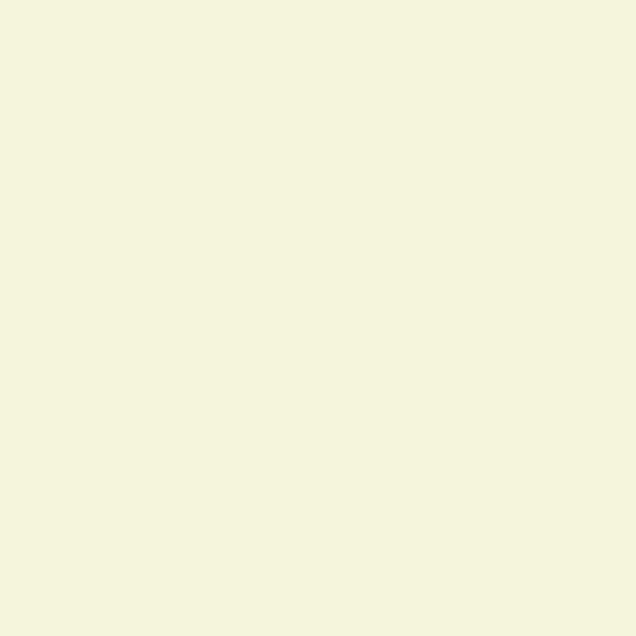

In [74]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
c = 0 
n= 0 
# collision_free_grasps = []
for grasps in collision_free_grasps:
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasps)
    mcts.rearr_action.scene_mngr.render_gripper(ax)

mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

print('Not collid : ', len(collision_free_grasps), "Collide :", len(augmented_grasps) - len(collision_free_grasps) )

# Collision check on the synthetic scene

In [59]:
for name in mcts.rearr_action.scene_mngr.scene.objs:
    print(name)


table
ben_cube0
can0
can1
milk0
cereal0
table_current
ben_cube0_current
can0_current
can1_current
milk0_current
cereal0_current


# Remove some objects in synthetic scene

In [ ]:
mcts.rearr_action.remove_mixed_scene()

In [ ]:
for i in mcts.rearr_action.scene_mngr.scene.objs:
    print(i)

In [ ]:
from pykin.utils.transform_utils import get_inverse_homogeneous

T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
         1.60000008e-01],
       [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
         6.34369494e-01],
       [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.63132538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 
w_T_cam = w_T_cam.dot(
            trimesh.transformations.euler_matrix(np.pi, 0, 0)
        )

cam_T_w = get_inverse_homogeneous(w_T_cam)
ones_arr = np.full((len(all_pc), 1), 1)
w_pc = np.hstack((all_pc, ones_arr))

cam_pc =  np.dot(cam_T_w, w_pc.T).T

# next_pc_segment도 변경해줘 
ones_arr = np.full((len(next_pc_segments[obj_to_manipulate]), 1), 1)
w_pc = np.hstack((next_pc_segments[obj_to_manipulate], ones_arr))

next_pc_segments[obj_to_manipulate] =  np.dot(cam_T_w, w_pc.T).T
